In [10]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [11]:
# Define Paths and Parameters
data_dir = '/content/drive/MyDrive/Colab Notebooks/Oral_Images_Dataset/augmented_data/'
img_width, img_height = 224, 224
batch_size = 32

In [12]:
# Data Preparation
# Only rescale because your data is already augmented
datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 1816 images belonging to 2 classes.
Found 454 images belonging to 2 classes.


In [13]:
# Load VGG19 Model
base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(img_width, img_height, 3)
)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
# Add Custom Classification Layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary output

model = Model(inputs=base_model.input, outputs=output)

In [15]:
# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [25]:
# Train Model
history= model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 291ms/step - accuracy: 0.9792 - loss: 0.0902 - val_accuracy: 0.8612 - val_loss: 0.3471
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 243ms/step - accuracy: 0.9771 - loss: 0.0844 - val_accuracy: 0.8722 - val_loss: 0.3103
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 245ms/step - accuracy: 0.9924 - loss: 0.0673 - val_accuracy: 0.8678 - val_loss: 0.3316
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 244ms/step - accuracy: 0.9896 - loss: 0.0624 - val_accuracy: 0.8767 - val_loss: 0.3234
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 248ms/step - accuracy: 0.9905 - loss: 0.0549 - val_accuracy: 0.8722 - val_loss: 0.3220
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 285ms/step - accuracy: 0.9892 - loss: 0.0509 - val_accuracy: 0.8678 - val_loss: 0.3186
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 248ms/step - accuracy: 0.9950 - loss: 0.0420 - val_accuracy: 0.8722 - val_loss: 0.3257
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 253ms/step - accuracy: 0.9963 - loss: 0.0374 - val_accu

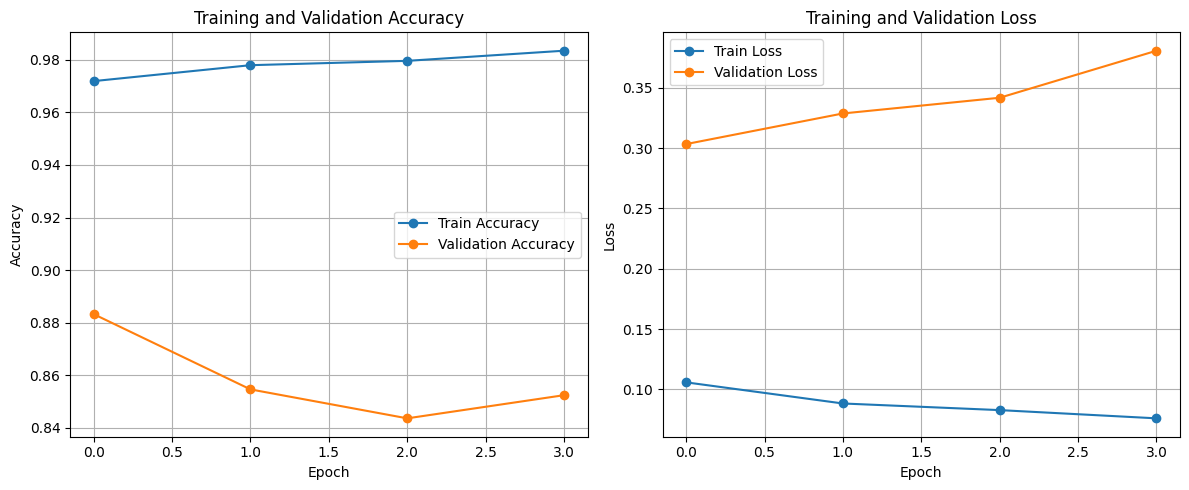

In [23]:
# Plot Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(validation_generator)
y_pred_classes = (y_pred > 0.5).astype("int32")
y_true = validation_generator.classes

print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step
[[112 119]
 [126  97]]
              precision    recall  f1-score   support

           0       0.47      0.48      0.48       231
           1       0.45      0.43      0.44       223

    accuracy                           0.46       454
   macro avg       0.46      0.46      0.46       454
weighted avg       0.46      0.46      0.46       454

